In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [24]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

### Build dataset
The dataset implements the function:
\begin{align*}
    y = \cos(2x_1) + \cos(3x_2)
\end{align*}

In [25]:
N = 1000
# Make X uniformly distributed between (-3, 3)
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

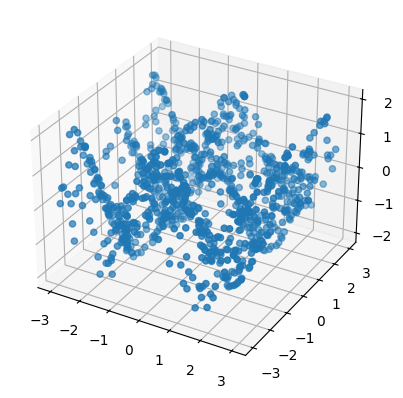

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y);

### SVM

In [27]:
# Use SVR (SVM for regression)
model = SVR(C=100.)
model.fit(X, Y)

SVR(C=100.0)

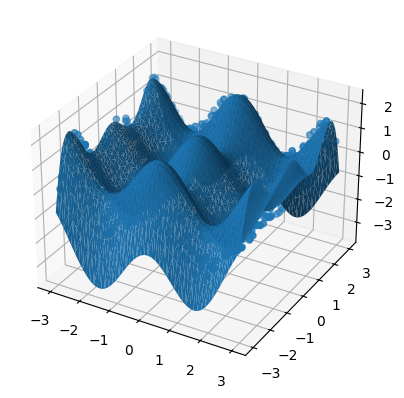

In [28]:
# Plot prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True);

See whether it can extrapolate: on range (-5, 5)

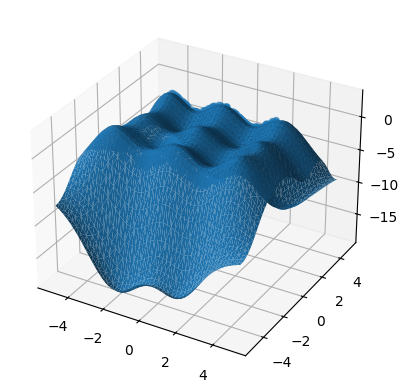

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# Surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True);

Obviously beyong -3 and 3, the results are bad.

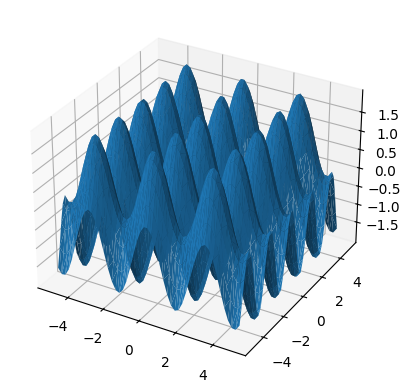

In [30]:
# Plot true results for (-5, 5)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Ytrue = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1]) # the true function
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Ytrue, linewidth=0.2, antialiased=True);

See train/test RMSE

In [31]:
print(f"Train RMSE: {rmse(Y, model.predict(X)):.4f}")
X_test = np.linspace(3, 5, 100)
xx, yy = np.meshgrid(X_test, X_test)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
y_true = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1])
y_pred = model.predict(Xgrid).flatten()
print(f"Test RMSE: {rmse(y_true, y_pred):.4f}")

Train RMSE: 0.2952
Test RMSE: 8.5475


### Random Forest

In [32]:
model = RandomForestRegressor()
model.fit(X, Y)

RandomForestRegressor()

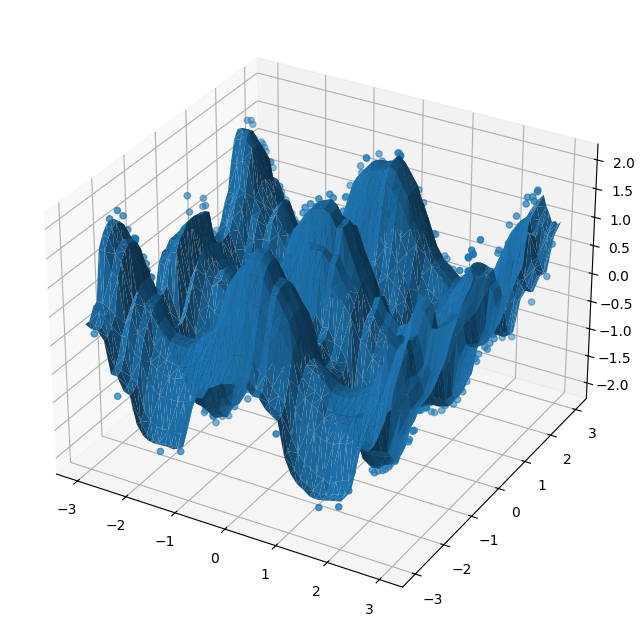

In [33]:
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

See whether it extrapolates

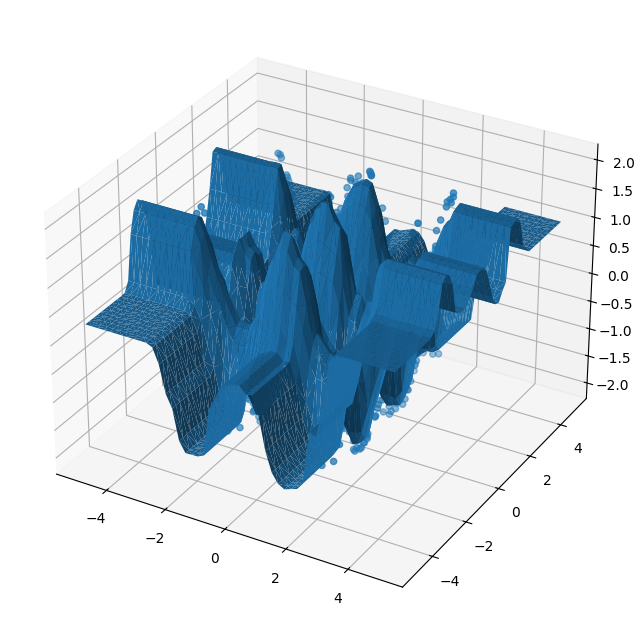

In [34]:
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

Doesn't seem good... Check train/test RMSE.

In [35]:
print(f"Train RMSE: {rmse(Y, model.predict(X)):.4f}")
X_test = np.linspace(3, 5, 100)
xx, yy = np.meshgrid(X_test, X_test)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
y_true = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1])
y_pred = model.predict(Xgrid).flatten()
print(f"Test RMSE: {rmse(y_true, y_pred):.4f}")

Train RMSE: 0.0712
Test RMSE: 1.4659


### MLP

In [36]:
model = MLPRegressor(hidden_layer_sizes=128, alpha=0., learning_rate_init=0.01)
model.fit(X, Y);

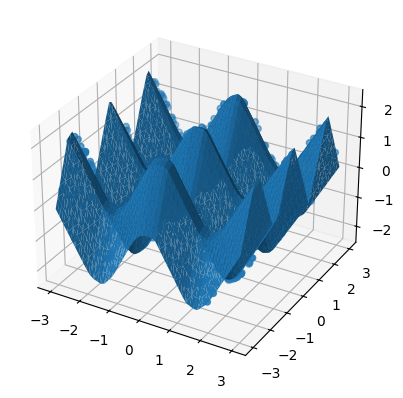

In [37]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);


Can it extrapolate?

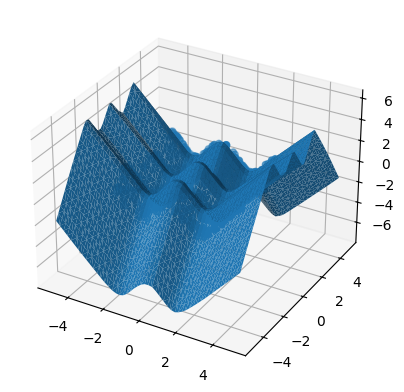

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);


See RMSE.

In [39]:
print(f"Train RMSE: {rmse(Y, model.predict(X)):.4f}")
X_test = np.linspace(3, 5, 100)
xx, yy = np.meshgrid(X_test, X_test)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
y_true = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1])
y_pred = model.predict(Xgrid).flatten()
print(f"Test RMSE: {rmse(y_true, y_pred):.4f}")

Train RMSE: 0.0967
Test RMSE: 2.6484


Stock Prices

In [40]:
!curl -O https://lazyprogrammer.me/course_files/SPY.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 38  246k   38 97546    0     0   167k      0  0:00:01 --:--:--  0:00:01  167k
100  246k  100  246k    0     0   424k      0 --:--:-- --:--:-- --:--:--  424k


In [41]:
import pandas as pd

df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [42]:
df.shape

(2263, 6)

In [44]:
train = df.iloc[:2000]['Close'].to_numpy()
test = df.iloc[2000:]['Close'].to_numpy()

Xtrain, Xtest = [], []
for t in range(len(train) - 1):
    x0 = train[t]
    x1 = train[t + 1]
    Xtrain.append((x0, x1))
    
for t in range(len(test) - 1):
    x0 = test[t]
    x1 = test[t + 1]
    Xtest.append((x0, x1))
    
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

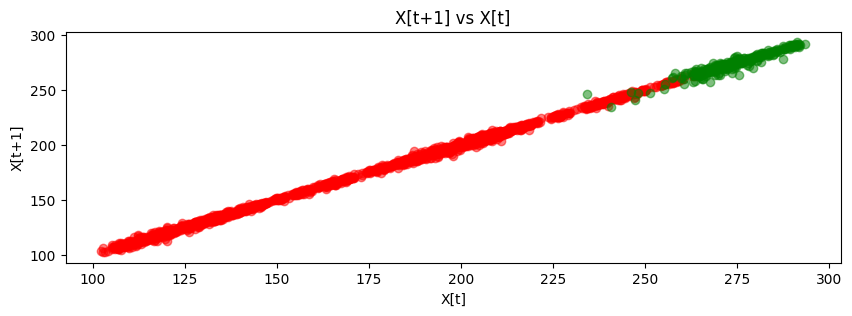

In [46]:
plt.figure(figsize=(10, 3))
plt.xlabel("X[t]")
plt.ylabel("X[t+1]")
plt.title("X[t+1] vs X[t]")
plt.scatter(Xtrain[:,0], Xtrain[:,1], c='r', alpha=0.5, label='train')
plt.scatter(Xtest[:,0], Xtest[:,1], c='g', alpha=0.5, label='test');